In [1]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import pylab 
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
DatosProyecto = pd.read_csv('/content/drive/My Drive/Artificial Inteligence applied to Engineering/Project_dataset.csv')

In [6]:
DatosProyecto.head()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1              Yes  Very good        7.0     No            No         No  
2              Yes       Fair        8.0    Yes            No         No  
3               No       Good        6.0     No            No        Yes  
4              Yes  Very good        8.0     No            No         No

In [7]:
DatosProyecto.shape

(319795, 18)

In [8]:
DatosProyecto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

Missing Values

In [9]:
DatosProyecto.isnull()

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0              False  False    False            False   False           False   
1              False  False    False            False   False           False   
2              False  False    False            False   False           False   
3              False  False    False            False   False           False   
4              False  False    False            False   False           False   
...              ...    ...      ...              ...     ...             ...   
319790         False  False    False            False   False           False   
319791         False  False    False            False   False           False   
319792         False  False    False            False   False           False   
319793         False  False    False            False   False           False   
319794         False  False    False            False   False           False   

        MentalHealth  DiffWalking    Sex  AgeCategory   Race  Diabetic  \
0              False        False  False        False  False     False   
1              False        False  False        False  False     False   
2              False        False  False        False  False     False   
3              False        False  False        False  False     False   
4              False        False  False        False  False     False   
...              ...          ...    ...          ...    ...       ...   
319790         False        False  False        False  False     False   
319791         False        False  False        False  False     False   
319792         False        False  False        False  False     False   
319793         False        False  False        False  False     False   
319794         False        False  False        False  False     False   

        PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  \
0                  False      False      False   False          False   
1                  False      False      False   False          False   
2                  False      False      False   False          False   
3                  False      False      False   False          False   
4                  False      False      False   False          False   
...                  ...        ...        ...     ...            ...   
319790             False      False      False   False          False   
319791             False      False      False   False          False   
319792             False      False      False   False          False   
319793             False      False      False   False          False   
319794             False      False      False   False          False   

        SkinCancer  
0            False  
1            False  
2            False  
3            False  
4            False  
...            ...  
319790       False  
319791       False  
319792       False  
319793       False  
319794       False  

[319795 rows x 18 columns]

In [10]:
DatosProyecto.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

# Análisis BMI, Smoking, AlcoholDrinking, Stroke

**BMI**:

Esta es una variable númerica que indica el estado nutricional de la persona considerando dos factores elementales: Su peso actual y su altura. Para personas mayores a 20 años, encontramos que su valor tiene los siguientes significados:


*   Por debajo de 18.5 = Bajo peso
*   18.5 – 24.9 = Normal
*   25.0 – 29.9 = Sobrepeso
*   30.0 o más = Obesidad

Estudios como el Framingham y el Build and Blood Pressure Study han demostrado que la obesidad es un factor de riesgo independiente para padecer enfermedad cardiovascular, y que la distribución regional de la grasa tiene una gran importancia en cuanto a las muertes de origen cardíaco.


**Análisis:** Partiendo de el histograma y el boxplot realizados y los datos extraidos, pudimos observar que el 75% de los datos se encuentran al rededor de la media la cual tiene un valor de 28.325399. En el histograma vemos como los datos en su mayoría tienden hacia la media, sin embargo hay una dispersión relevante explicada por el valor mínimo en los datos de 12.020000 y el máximo de 94.850000 lo cual se traduce en un amplio rango, cabe recalcar que hacia los extremos del histograma la frecuencia de dichos valores no es importante. En el boxplot encontramos que existen varios valores atipicos que son de importancia pues nos dan información sobre los individuos que se alejan de un estado físico adecuado pues su IBM se aleja de un valor normal, de hecho en su mayoría padecen de obecidad lo que los hace más suceptibles a padecer de enfermedades cardiacas. 

---
*Acerca del índice de masa corporal para adultos. (2022, 29 agosto). Centers for Disease Control and Prevention. https://www.cdc.gov/healthyweight/spanish/assessing/bmi/adult_bmi/index.html*

*(1999, 1 octubre). La obesidad como factor de riesgo cardiovascular | Endocrinología y Nutrición. https://www.elsevier.es/es-revista-endocrinologia-nutricion-12-articulo-la-obesidad-como-factor-riesgo-8620*

In [96]:
DatosProyecto[["BMI"]]

BMI
0       16.60
1       20.34
2       26.58
3       24.21
4       23.71
...       ...
319790  27.41
319791  29.84
319792  24.24
319793  32.81
319794  46.56

[319795 rows x 1 columns]

In [12]:
DatosProyecto[["BMI"]].describe()

BMI
count  319795.000000
mean       28.325399
std         6.356100
min        12.020000
25%        24.030000
50%        27.340000
75%        31.420000
max        94.850000

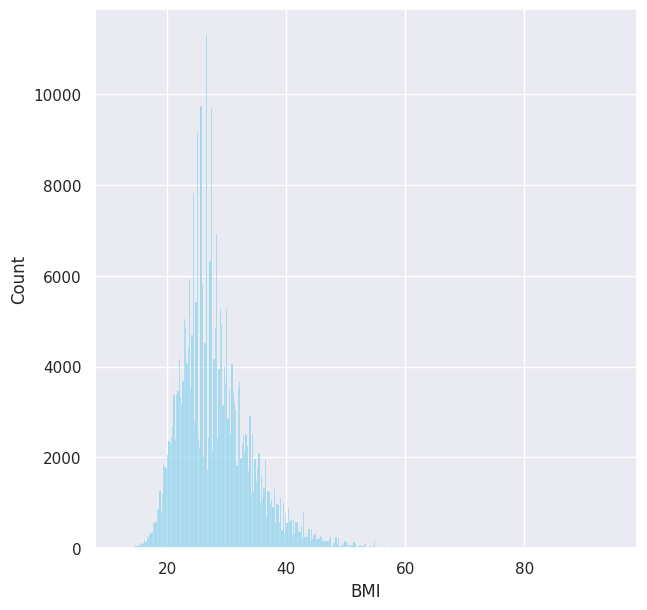

In [13]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(1, 1, figsize=(7, 7))

sns.histplot(data=DatosProyecto, x="BMI", color="skyblue");

In [ ]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(1, 1, figsize=(7, 7))

sns.histplot(data=DatosProyecto, x="BMI", color="skyblue");

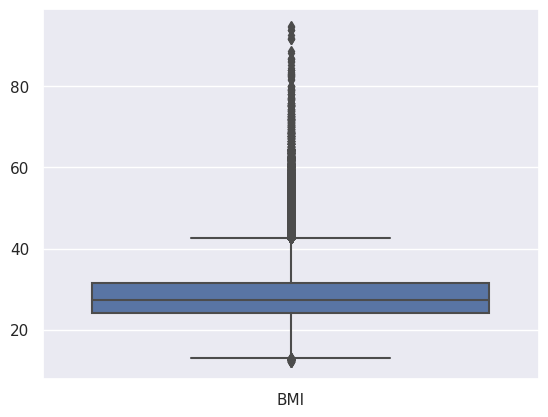

In [14]:
sns.boxplot(data= DatosProyecto[["BMI"]]);

**SMOKING**:

Esta es una variable binaria categórica que indica si el individuo fuma o no pues este es un factor de riesgo relevante en los temas de aflicciones cardiacas. Los posibles valores son de "Si" o "No".

Actualmente, el tabaco se sitúa entre los factores de riesgo 
independientes más reflejados en las guías de actuación 
de diversas sociedades cardiológicas internacionales para 
la valoración del riesgo cardiovascular: consumo de cigarrillos, hipertensión arterial, colesterol total y LDL (low density lipoproteins o colesterol malo) elevados, colesterol 
HDL (high-density lipoproteins o colesterol bueno) disminuido, diabetes mellitus, obesidad, sedentarismo y edad 
avanzada.
El efecto negativo del tabaco está directamente 
relacionado con la cantidad de cigarrillos fumados en un 
día y la antigüedad del hábito fumador. Además, el riesgo 
es aún mayor cuando la edad de comienzo del hábito es 
anterior a los 15 años.

**Análisis:** Partiendo de el diagrama de pie y barras realizados, se observa que a pesar de que la mayoría de los individuos no fuman, el porcentaje de los que fuman es relevante pues representa el 41,2% de los datos, razón por la cual esta variable no sugiere una relación clara con la clase *HeartDisease*. Posiblemente se podría describir mejor la relación entre el tabaquismo y las enfermedades cardiovasculares si se contara con mayor información sobre la cantidad de cigarrillos fumados en un día y la antigüedad del hábito fumador pues, como se mencionó previamente. 

---
(2009). Libro de la salud cardiovascular del Hospital Clínico San Carlos y la Fundación BBVA (1.a ed., Vol. 1). Fundación BBVA. https://www.fbbva.es/publicaciones/libro-de-la-salud-cardiovascular-del-hospital-clinico-san-carlos-y-la-fundacion-bbva/

In [15]:
DatosProyecto[["Smoking"]]

Smoking
0          Yes
1           No
2          Yes
3           No
4           No
...        ...
319790     Yes
319791     Yes
319792      No
319793      No
319794      No

[319795 rows x 1 columns]

In [16]:
DatosProyecto[["Smoking"]].describe()

Smoking
count   319795
unique       2
top         No
freq    187887

In [17]:
DatosProyecto[["Smoking"]].value_counts()

Smoking
No         187887
Yes        131908
dtype: int64

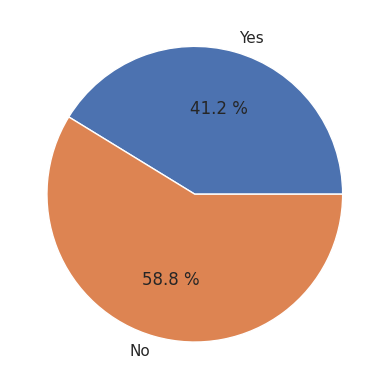

In [18]:
label = ["Yes", "No"]
value = [131908,187887]
plt.pie(value, labels=label, autopct="%0.1f %%")
plt.show()

(array([131908.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 187887.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

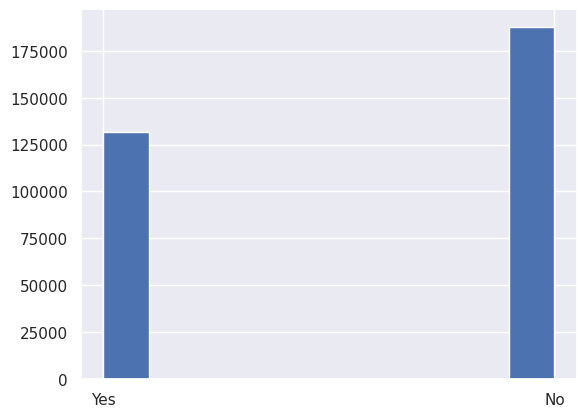

In [19]:
plt.hist(DatosProyecto[["Smoking"]])

**AlcoholDrinking**:

Esta es una variable binaria categórica que indica si el individuo bebe o no alcohol de forma habitual pues este es un factor de riesgo relevante en los temas de aflicciones cardiacas. Los posibles valores son de "Si" o "No". 

Según expertos el consumo moderado de alcohol puede reducir el riesgo de enfermedad coronaria, tanto en hombres como en mujeres. No sólo reduce el riesgo de sufrir la enfermedad coronaria, sino también la 
mortalidad por esas enfermedades. 
No obstante, existe una clara asociación demostrada entre el consumo 
excesivo de alcohol y la aparición de tensión arterial elevada (hipertensión arterial). Incluso en algunos estudios 
epidemiológicos se ha estimado que más de un 10% de los 
varones presenta hipertensión por un consumo elevado 
de alcohol.

**Análisis:** Partiendo de el diagrama de pie y barras realizados, es claro que en su mayoría los individuos no consumen alcohol frecuentemente, de hecho, el 93,2% de estos no lo hacen. Podría pensarse que este dato podría ser relevante con respecto a la descripción de la clase *HeartDisease* pues en en un porcentaje similar los individuos no padecen de una enfermedad cardiovascular.

---
(2009). Libro de la salud cardiovascular del Hospital Clínico San Carlos y la Fundación BBVA (1.a ed., Vol. 1). Fundación BBVA. https://www.fbbva.es/publicaciones/libro-de-la-salud-cardiovascular-del-hospital-clinico-san-carlos-y-la-fundacion-bbva/

In [20]:
DatosProyecto[["AlcoholDrinking"]].describe()

AlcoholDrinking
count           319795
unique               2
top                 No
freq            298018

In [21]:
DatosProyecto[["AlcoholDrinking"]].value_counts()

AlcoholDrinking
No                 298018
Yes                 21777
dtype: int64

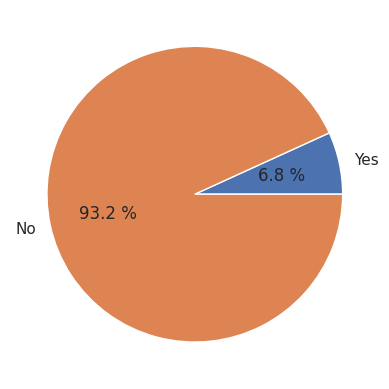

In [22]:
label = ["Yes", "No"]
value = [21777,298018]
plt.pie(value, labels=label, autopct="%0.1f %%")
plt.show()

(array([298018.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  21777.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

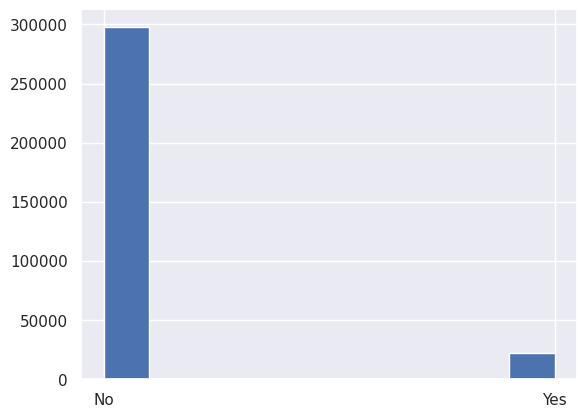

In [23]:
plt.hist(DatosProyecto[["AlcoholDrinking"]])

# **Stroke**

Esta es una variable binaria categórica que indica si el individuo ha tenido un ataque cardiaco previamente. Los posibles valores son de "Si" o "No". 

Las consecuencias de un infarto al miocardio siempre dependerán de lo extenso que haya sido. Si el infarto agudo de miocardio es leve, de poca extensión, el paciente tiene altas probabilidades de recuperarse y llevar una vida normal, aunque deberá controlar los factores de riesgo para impedir la ocurrencia de un nuevo infarto. la secuela más temida de un infarto al miocardio es la insuficiencia cardiaca, es decir, el paciente queda con un daño permanente en el corazón. Debemos recordar que el corazón es una bomba, y tras un infarto muy extenso, pierde la capacidad de contracción, lo que determina que ese paciente pueda requerir de un monitoreo permanente, tanto con fármacos, como con ejercicios y cambios en su alimentación.

**Análisis:** Partiendo de el gráfico de barras y pie realizados, se observa que en su mayoría los individuos no han tenido un infarto previamente, en total el 96,2%. Esta es una variable que instintivamente tenderiamos a asociar a la clase, sin embargo, factores más específicos como la duración del infarto son de bastante importancia y, de igual forma, si las personas que tuvieron el infarto contiuaron con los mismos habitos que llevaban.  

---
D. (2021, 24 junio). Causas, síntomas y secuelas de un infarto al corazón. Clínica Dávila. https://www.davila.cl/causas-sintomas-y-secuelas-de-un-infarto-al-corazon/

In [24]:
DatosProyecto[["Stroke"]].describe()

Stroke
count   319795
unique       2
top         No
freq    307726

In [25]:
DatosProyecto[["Stroke"]].value_counts()

Stroke
No        307726
Yes        12069
dtype: int64

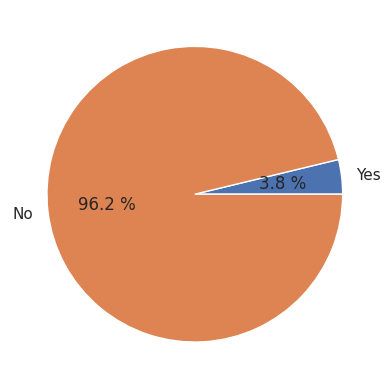

In [26]:
label = ["Yes", "No"]
value = [12069,307726]
plt.pie(value, labels=label, autopct="%0.1f %%")
plt.show()

(array([307726.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  12069.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

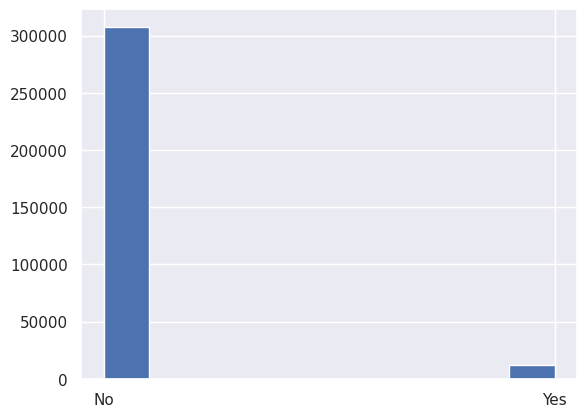

In [27]:
plt.hist(DatosProyecto[["Stroke"]])

# **PhysicalHealth**

Esta es una variable discreta que indica los días del mes que ha estado enfermo. Los posibles valores están en rango entre 0 y 30.

Esta variable es importante pues ayudará a entender si hay alguna relación entre el estado de salud del individuo con la posibilidad de que esté se más o menos propenso a tener un paro cardiaco. De no encontrar una relacción directa, se estaría hablando de un ataque cardiaco silencioso o súbito, en cuyo caso el individuo solo se daría cuenta en pleno ataque.

**Análisis:** Gracias a los gráficos se puede saber que la gran mayoría de los individuos suelen llevar una vida aparentemente saludable, pues más del 50% no pasa un solo día enfermo durante el mes. Por otro lado, si hay un grupo representativo que presenta malestar durante los 30 dias del mes. Este análisis concluye que muchos pacientes relativamente saludable, podrían ser propensos a tener un pari cardiaco sin necesidad de tener algún síntoma previo.
 

---
Paro cardíaco súbito. The Texas Heart Institute. https://www.texasheart.org/heart-health/heart-information-center/topics/paro-cardiaco-subito/

In [54]:
DatosProyecto[["PhysicalHealth"]].describe()

PhysicalHealth
count    319795.00000
mean          3.37171
std           7.95085
min           0.00000
25%           0.00000
50%           0.00000
75%           2.00000
max          30.00000

In [55]:
DatosProyecto[["PhysicalHealth"]].value_counts()

PhysicalHealth
0.0               226589
30.0               19509
2.0                14880
1.0                10489
3.0                 8617
5.0                 7606
10.0                5453
15.0                5012
7.0                 4629
4.0                 4468
20.0                3216
14.0                2893
6.0                 1270
25.0                1164
8.0                  924
21.0                 626
12.0                 605
28.0                 446
29.0                 204
9.0                  180
18.0                 167
16.0                 135
27.0                 124
17.0                 110
13.0                  91
22.0                  89
11.0                  85
24.0                  67
26.0                  66
23.0                  46
19.0                  35
dtype: int64

(array([251958.,  20691.,   6823.,   5718.,   3589.,   5257.,   3418.,
           761.,   1297.,  20283.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <BarContainer object of 10 artists>)

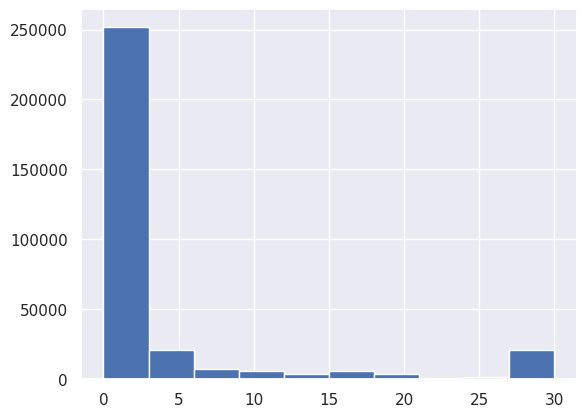

In [56]:
plt.hist(DatosProyecto[["PhysicalHealth"]])

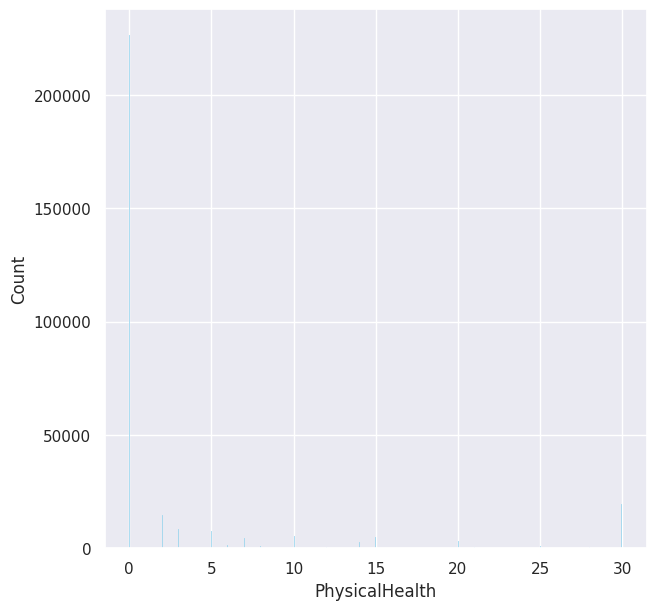

In [59]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(1, 1, figsize=(7, 7))

sns.histplot(data=DatosProyecto, x="PhysicalHealth", color="skyblue");

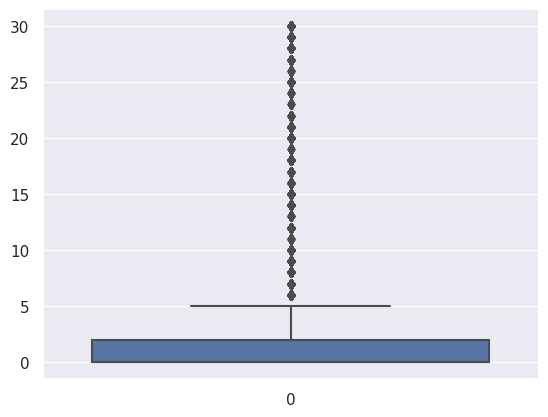

In [58]:
sns.boxplot(data=DatosProyecto["PhysicalHealth"]);

# **MentalHealth**

Esta es una variable discreta que indica cuantos días del mes el individuo no se ha sentido bien mentalmente. Los valores de la variable puede estar en un rango entre 1 y 30 días.

Esta variable es muy importante pues permitirá encontrar si existe alguna relación entre el estado de salud mental del individuo y la posibilidad de que sufra un paro cardiaco. Es importante considerar que hoy en día se sabe que a mayor nivel de estrés y/o ansiedad, peor el estado físico, lo cual podría evidenciarse en un paro cardiaco. 

**Análisis:** Gracias a las gráficas se puede saber que la gran mayoría de los individuos no suelen presentar un estado mental con complicaciones, pues más del 50% no presenta un solo día con complicaciones mentales durante el mes. Sin embargo, si se puede observar un porcentaje pequeño que sí presenta un mal estado de salud mental, ya sea durante 5, 10, 15 y 30 días (siendo estos los percentiles más altos)

El estrés emocional eleva el riesgo de infarto sin tener problemas coronarios. (2017, 29 julio). El Vanguardista. https://www.lavanguardia.com/vida/salud/20170829/43894434621/congreso-cardiologia-estres-emocional-aumenta-riesgo-infarto.html

El estrés prolongado puede causar ataques cardíacos. (2021, 5 agosto). Salud Bienestar. https://www.diariodesevilla.es/salud/investigacion-tecnologia/estres-prolongado-ataques-cardiacos-salud-mental_0_1598840623.html

In [60]:
DatosProyecto[["MentalHealth"]].describe()

MentalHealth
count  319795.000000
mean        3.898366
std         7.955235
min         0.000000
25%         0.000000
50%         0.000000
75%         3.000000
max        30.000000

(array([231187.,  29994.,   8132.,  10799.,   2915.,  10176.,   5663.,
           518.,   2080.,  18331.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <BarContainer object of 10 artists>)

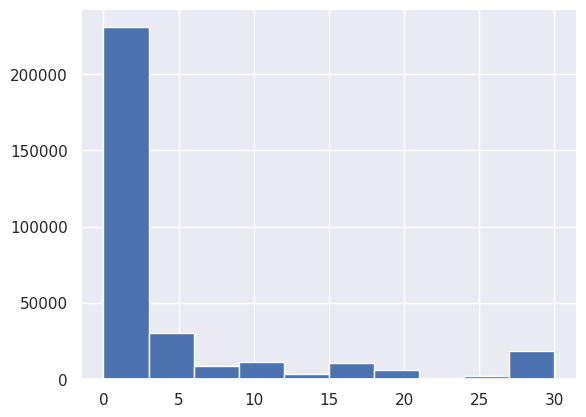

In [61]:
plt.hist(DatosProyecto[["MentalHealth"]])

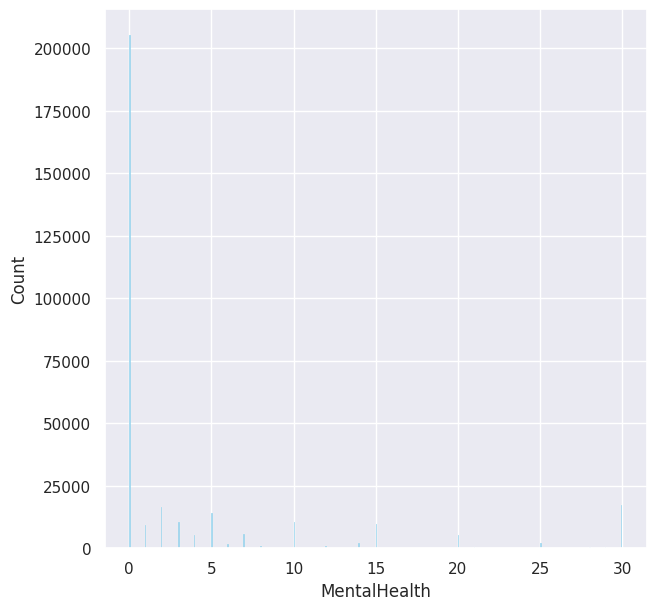

In [62]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(1, 1, figsize=(7, 7))

sns.histplot(data=DatosProyecto, x="MentalHealth", color="skyblue");

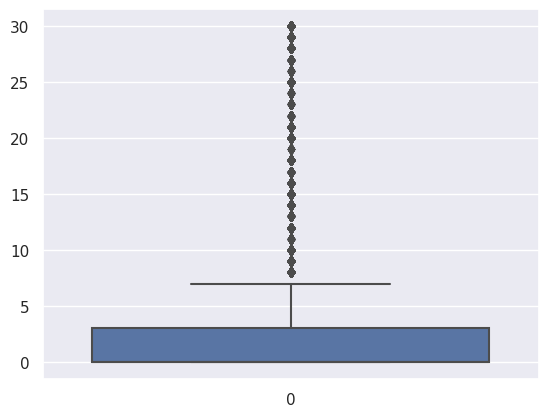

In [63]:
sns.boxplot(data=DatosProyecto["MentalHealth"]);

# **DiffWalking**

Esta es una variable categórica que indica si el individuo ha tenido problemas para caminar o subir escaleras. Los posibles valores son "Si" y "No".

Esta variable es muy importante pues el dolor en la parte inferior del cuerpo puede deberse a lesiones, artritis o estar en mala forma, pero también podría indicar problemas de circulación en las piernas causados por una enfermedad arterial periférica. “Al igual que las obstrucciones en las arterias coronarias pueden causar ataques cardíacos, las obstrucciones en las arterias de las piernas pueden causar dolor al caminar”. (Dr. Deepak L. Bhatt, director de Mount Sinai Heart)

**Análisis:** Gracias a las gráficas se puede saber que la gran mayoría de los individuos no suelen presentar dificultad para caminar o subir las escaleras; de esta forma, se podría descartar este síntoma y analizar el resto. Sin embargo, si es importante analzar la correlación en la base de datos entre los pacientes que sí presentan dificultad para caminar o subir las escaleras y los que sí sufrieron ataques cardiacos.

10 señales sigilosas de que podrías tener una enfermedad del corazón. (2023, 27 enero). EAARP. https://www.aarp.org/espanol/salud/enfermedades-y-tratamientos/info-2022/sintomas-enfermedades-del-corazon.html

In [78]:
DatosProyecto[["DiffWalking"]].describe()

DiffWalking
count  319795.000000
mean        0.138870
std         0.345812
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000

In [98]:
DatosProyecto[["DiffWalking"]].value_counts()

DiffWalking
0              275385
1               44410
dtype: int64

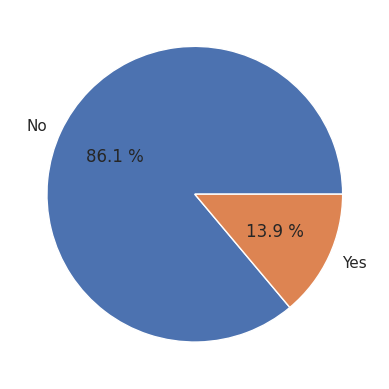

In [82]:
label = ["No", "Yes"]
value = [275385,44410]
plt.pie(value, labels=label, autopct="%0.1f %%")
plt.show()

(array([275385.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  44410.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

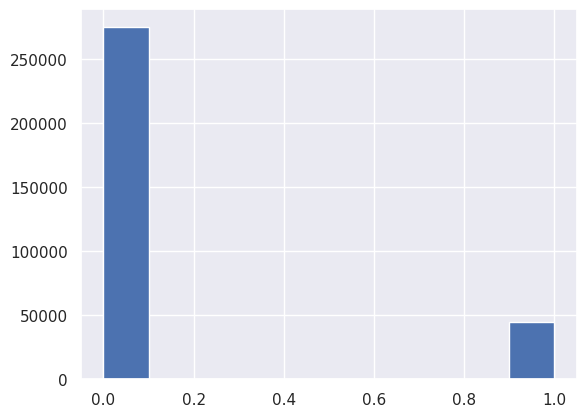

In [73]:
plt.hist(DatosProyecto[["DiffWalking"]])

## <CENTER> ---- PARECE QUE HASTA ACA ES EL ANALISIS ---- </CENTER>

# **Sex**

Esta es una variable categórica que indica si el individuo ha tenido problemas para caminar o subir escaleras. Los psobles valores son "Female" y "Male".

Esta variable es muy importante pues permitirá analizar alguna posible relación entre el riesgo de padecer un ataque cardiaco y el sexo del invidividuo. Según el último informe nacional de 2022, la mortalidad asociada a cardiopatía isquémica afecta al doble de mujeres que hombres (La Vanguardia), por lo cual es muy importante poder detectar un patrón que pueda diferenciar síntomas para así poder detectar a tiempo algún indicador de posible ataque cardiaco a futuro.

**Análisis:** Gracias a las gráficas se puede saber que la gran mayoría de los individuos analizadas son mujeres. Sin embargo, 

Los hombres sufren más infartos, aunque suelen ser más graves en mujeres. (2022, 29 septiembre). La Vanguardia. https://www.lavanguardia.com/ciencia/20220929/8547629/ataques-corazon-son-mas-comunes-hombres-mas-graves-mujeres.html#:~:text=%22Seg%C3%BAn%20la%20serie%20de%20pacientes,emergencias%20card%C3%ADacas%20en%20la%20mujer

In [ ]:
!pip install dataprep = 

/usr/local/lib/python3.9/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))
The plot will not show in a notebook environment, please try 'show_browser' if you want to open it in browser



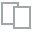
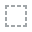
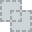
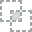
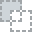
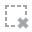
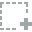
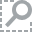
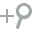
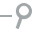
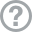
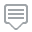
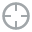
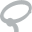
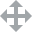
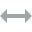
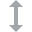
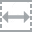
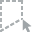
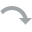
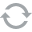
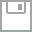
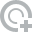
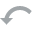
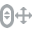
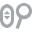
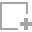
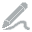
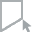
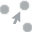
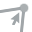
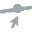

In [ ]:
from dataprep.eda import create_report

create_report(DatosProyecto).show()

In [28]:
DatosProyecto = pd.get_dummies(DatosProyecto, columns=['Race','GenHealth','AgeCategory','Sex'])

In [29]:
DatosProyecto['HeartDisease'] = pd.Series(np.where(DatosProyecto.HeartDisease.values == 'Yes',1,0),DatosProyecto.index)

In [30]:
DatosProyecto['Smoking'] = pd.Series(np.where(DatosProyecto.Smoking.values == 'Yes',1,0),DatosProyecto.index)

In [31]:
DatosProyecto['AlcoholDrinking'] = pd.Series(np.where(DatosProyecto.AlcoholDrinking.values == 'Yes',1,0),DatosProyecto.index)

In [32]:
DatosProyecto['Stroke'] = pd.Series(np.where(DatosProyecto.Stroke.values == 'Yes',1,0),DatosProyecto.index)

In [33]:
DatosProyecto['DiffWalking'] = pd.Series(np.where(DatosProyecto.DiffWalking.values == 'Yes',1,0),DatosProyecto.index)

In [34]:
DatosProyecto['Diabetic'] = pd.Series(np.where(DatosProyecto.Diabetic.values == 'Yes',1,0),DatosProyecto.index)

In [35]:
DatosProyecto['PhysicalActivity'] = pd.Series(np.where(DatosProyecto.PhysicalActivity.values == 'Yes',1,0),DatosProyecto.index)

In [36]:
DatosProyecto['Asthma'] = pd.Series(np.where(DatosProyecto.Asthma.values == 'Yes',1,0),DatosProyecto.index)

In [37]:
DatosProyecto['KidneyDisease'] = pd.Series(np.where(DatosProyecto.KidneyDisease.values == 'Yes',1,0),DatosProyecto.index)

In [38]:
DatosProyecto['SkinCancer'] = pd.Series(np.where(DatosProyecto.SkinCancer.values == 'Yes',1,0),DatosProyecto.index)

In [39]:
DatosProyecto.head()

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0  16.60        1                0       0             3.0   
1             0  20.34        0                0       1             0.0   
2             0  26.58        1                0       0            20.0   
3             0  24.21        0                0       0             0.0   
4             0  23.71        0                0       0            28.0   

   MentalHealth  DiffWalking  Diabetic  PhysicalActivity  ...  \
0          30.0            0         1                 1  ...   
1           0.0            0         0                 1  ...   
2          30.0            0         1                 1  ...   
3           0.0            0         0                 0  ...   
4           0.0            1         0                 1  ...   

   AgeCategory_45-49  AgeCategory_50-54  AgeCategory_55-59  AgeCategory_60-64  \
0                  0                  0                  1                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   AgeCategory_65-69  AgeCategory_70-74  AgeCategory_75-79  \
0                  0                  0                  0   
1                  0                  0                  0   
2                  1                  0                  0   
3                  0                  0                  1   
4                  0                  0                  0   

   AgeCategory_80 or older  Sex_Female  Sex_Male  
0                        0           1         0  
1                        1           1         0  
2                        0           0         1  
3                        0           1         0  
4                        0           1         0  

[5 rows x 40 columns]

In [40]:
DatosProyecto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 40 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   HeartDisease                         319795 non-null  int64  
 1   BMI                                  319795 non-null  float64
 2   Smoking                              319795 non-null  int64  
 3   AlcoholDrinking                      319795 non-null  int64  
 4   Stroke                               319795 non-null  int64  
 5   PhysicalHealth                       319795 non-null  float64
 6   MentalHealth                         319795 non-null  float64
 7   DiffWalking                          319795 non-null  int64  
 8   Diabetic                             319795 non-null  int64  
 9   PhysicalActivity                     319795 non-null  int64  
 10  SleepTime                            319795 non-null  float64
 11  Asthma       

In [41]:
DatosProyecto.describe()

HeartDisease            BMI        Smoking  AlcoholDrinking  \
count  319795.000000  319795.000000  319795.000000    319795.000000   
mean        0.085595      28.325399       0.412477         0.068097   
std         0.279766       6.356100       0.492281         0.251912   
min         0.000000      12.020000       0.000000         0.000000   
25%         0.000000      24.030000       0.000000         0.000000   
50%         0.000000      27.340000       0.000000         0.000000   
75%         0.000000      31.420000       1.000000         0.000000   
max         1.000000      94.850000       1.000000         1.000000   

              Stroke  PhysicalHealth   MentalHealth    DiffWalking  \
count  319795.000000    319795.00000  319795.000000  319795.000000   
mean        0.037740         3.37171       3.898366       0.138870   
std         0.190567         7.95085       7.955235       0.345812   
min         0.000000         0.00000       0.000000       0.000000   
25%         0.000000         0.00000       0.000000       0.000000   
50%         0.000000         0.00000       0.000000       0.000000   
75%         0.000000         2.00000       3.000000       0.000000   
max         1.000000        30.00000      30.000000       1.000000   

            Diabetic  PhysicalActivity  ...  AgeCategory_45-49  \
count  319795.000000     319795.000000  ...      319795.000000   
mean        0.127588          0.775362  ...           0.068141   
std         0.333631          0.417344  ...           0.251987   
min         0.000000          0.000000  ...           0.000000   
25%         0.000000          1.000000  ...           0.000000   
50%         0.000000          1.000000  ...           0.000000   
75%         0.000000          1.000000  ...           0.000000   
max         1.000000          1.000000  ...           1.000000   

       AgeCategory_50-54  AgeCategory_55-59  AgeCategory_60-64  \
count      319795.000000      319795.000000      319795.000000   
mean            0.079370           0.093050           0.105336   
std             0.270315           0.290503           0.306987   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             0.000000           0.000000           0.000000   
max             1.000000           1.000000           1.000000   

       AgeCategory_65-69  AgeCategory_70-74  AgeCategory_75-79  \
count      319795.000000      319795.000000      319795.000000   
mean            0.106790           0.097140           0.067174   
std             0.308847           0.296149           0.250324   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             0.000000           0.000000           0.000000   
max             1.000000           1.000000           1.000000   

       AgeCategory_80 or older     Sex_Female       Sex_Male  
count            319795.000000  319795.000000  319795.000000  
mean                  0.075527       0.524727       0.475273  
std                   0.264239       0.499389       0.499389  
min                   0.000000       0.000000       0.000000  
25%                   0.000000       0.000000       0.000000  
50%                   0.000000       1.000000       0.000000  
75%                   0.000000       1.000000       1.000000  
max                   1.000000       1.000000       1.000000  

[8 rows x 40 columns]

In [42]:
correlacion = DatosProyecto.corr()

In [43]:
correlacion

HeartDisease       BMI   Smoking  \
HeartDisease                             1.000000  0.051803  0.107764   
BMI                                      0.051803  1.000000  0.023118   
Smoking                                  0.107764  0.023118  1.000000   
AlcoholDrinking                         -0.032080 -0.038816  0.111768   
Stroke                                   0.196835  0.019733  0.061226   
PhysicalHealth                           0.170721  0.109788  0.115352   
MentalHealth                             0.028591  0.064131  0.085157   
DiffWalking                              0.201258  0.181678  0.120074   
Diabetic                                 0.183072  0.203494  0.058434   
PhysicalActivity                        -0.100030 -0.150616 -0.097174   
SleepTime                                0.008327 -0.051822 -0.030336   
Asthma                                   0.041444  0.092345  0.024149   
KidneyDisease                            0.145197  0.050768  0.034920   
SkinCancer                               0.093317 -0.033644  0.033977   
Race_American Indian/Alaskan Native      0.008547  0.026347  0.035667   
Race_Asian                              -0.030262 -0.078643 -0.060308   
Race_Black                              -0.010156  0.080672 -0.038249   
Race_Hispanic                           -0.036163  0.023750 -0.066873   
Race_Other                              -0.003039  0.012535  0.016205   
Race_White                               0.040121 -0.049060  0.072367   
GenHealth_Excellent                     -0.116042 -0.179993 -0.117444   
GenHealth_Fair                           0.147954  0.127364  0.095620   
GenHealth_Good                           0.039033  0.118047  0.059651   
GenHealth_Poor                           0.174662  0.062501  0.086520   
GenHealth_Very good                     -0.101886 -0.065954 -0.052305   
AgeCategory_18-24                       -0.075385 -0.107060 -0.138397   
AgeCategory_25-29                       -0.065759 -0.023705 -0.052149   
AgeCategory_30-34                       -0.065611  0.004500 -0.015226   
AgeCategory_35-39                       -0.066685  0.021160  0.004290   
AgeCategory_40-44                       -0.059196  0.036475  0.010680   
AgeCategory_45-49                       -0.049733  0.049427 -0.006637   
AgeCategory_50-54                       -0.032648  0.050800 -0.011667   
AgeCategory_55-59                       -0.013276  0.038984  0.008701   
AgeCategory_60-64                        0.016152  0.026797  0.031892   
AgeCategory_65-69                        0.042626  0.019006  0.030367   
AgeCategory_70-74                        0.082578 -0.007720  0.045288   
AgeCategory_75-79                        0.098690 -0.030726  0.048040   
AgeCategory_80 or older                  0.143041 -0.094780  0.013569   
Sex_Female                              -0.070040 -0.026940 -0.085052   
Sex_Male                                 0.070040  0.026940  0.085052   

                                     AlcoholDrinking    Stroke  \
HeartDisease                               -0.032080  0.196835   
BMI                                        -0.038816  0.019733   
Smoking                                     0.111768  0.061226   
AlcoholDrinking                             1.000000 -0.019858   
Stroke                                     -0.019858  1.000000   
PhysicalHealth                             -0.017254  0.137014   
MentalHealth                                0.051282  0.046467   
DiffWalking                                -0.035328  0.174143   
Diabetic                                   -0.058208  0.108407   
PhysicalActivity                            0.017487 -0.079455   
SleepTime                                  -0.005065  0.011900   
Asthma                                     -0.002202  0.038866   
KidneyDisease                              -0.028280  0.091167   
SkinCancer                                 -0.005702  0.048116   
Race_American Indian/Alaskan Native        -0.004243 

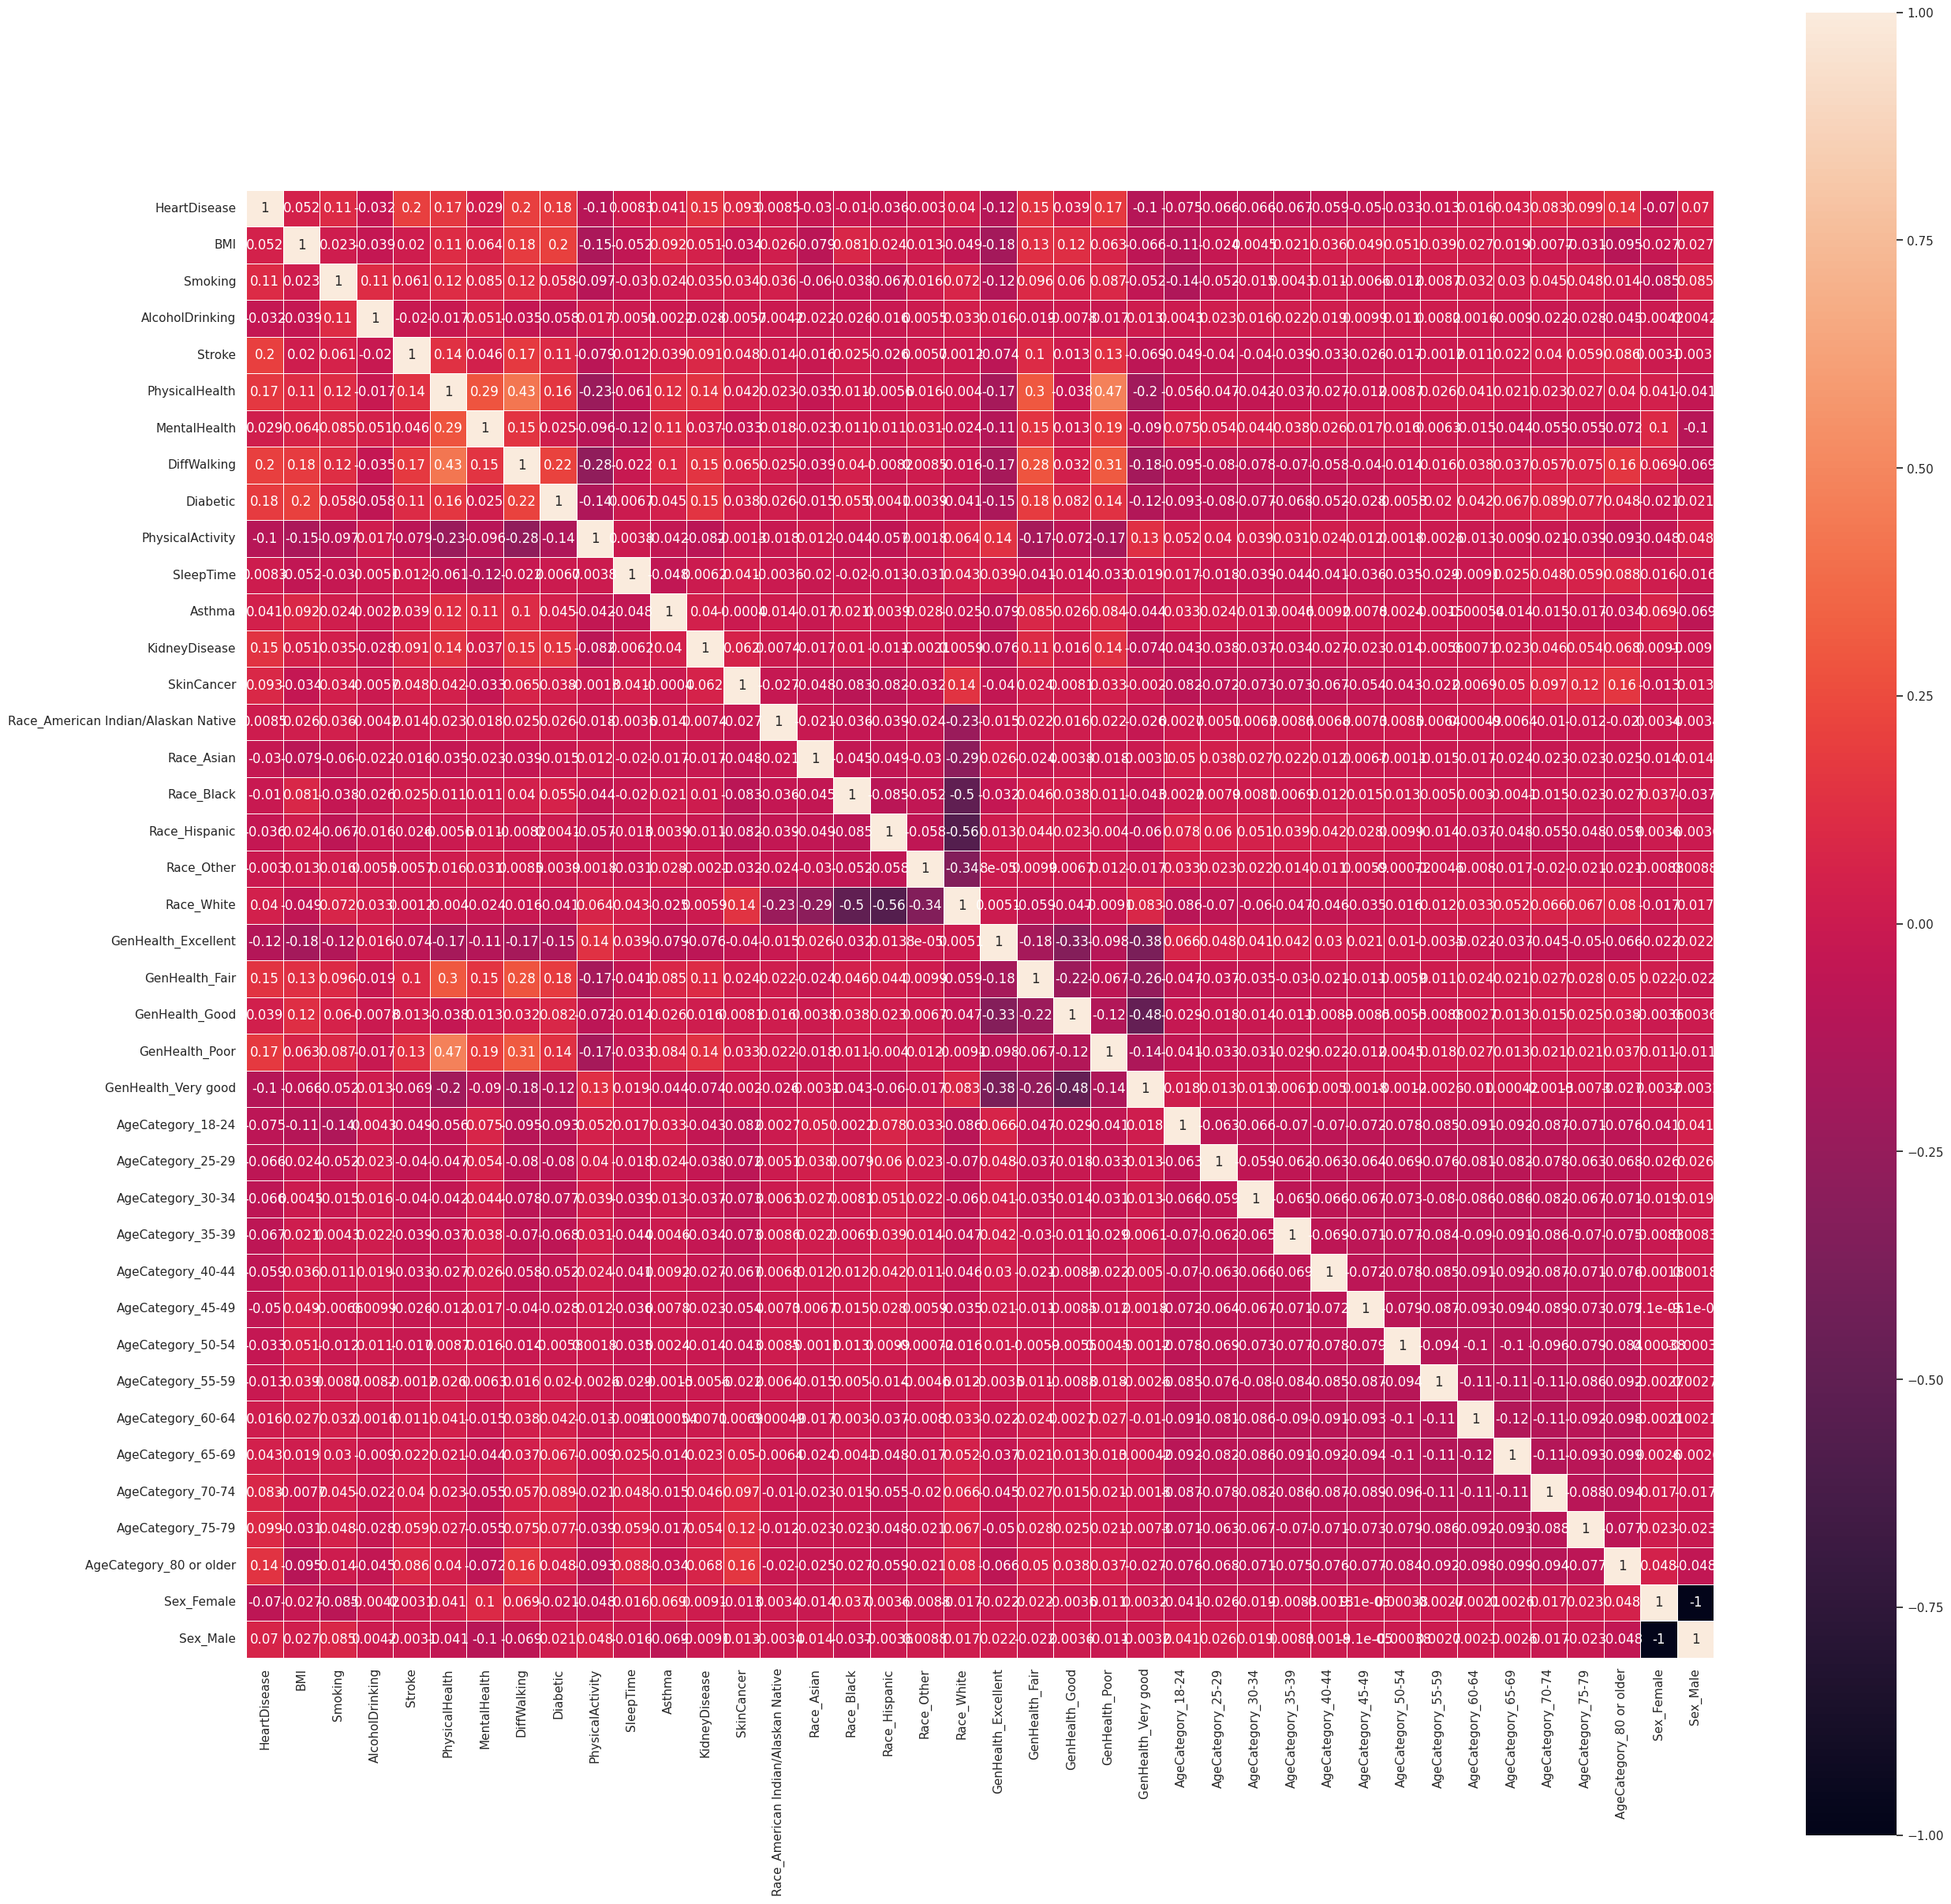

In [44]:
plt.figure(figsize=(30, 30))
sns.heatmap(correlacion, annot= True, linewidths=0.5, square=True);

# **Training y test set**

In [45]:
X = DatosProyecto.drop('HeartDisease',axis=1)
y = DatosProyecto['HeartDisease']

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10,stratify=y)

In [47]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223856 entries, 207685 to 46222
Data columns (total 39 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   BMI                                  223856 non-null  float64
 1   Smoking                              223856 non-null  int64  
 2   AlcoholDrinking                      223856 non-null  int64  
 3   Stroke                               223856 non-null  int64  
 4   PhysicalHealth                       223856 non-null  float64
 5   MentalHealth                         223856 non-null  float64
 6   DiffWalking                          223856 non-null  int64  
 7   Diabetic                             223856 non-null  int64  
 8   PhysicalActivity                     223856 non-null  int64  
 9   SleepTime                            223856 non-null  float64
 10  Asthma                               223856 non-null  int64  
 11  KidneyDis

Escalar

In [48]:
scaler = MinMaxScaler()

In [49]:
scaler.fit(X_train)

MinMaxScaler()

Datos Proyecto Training Escalado

In [50]:
DPTr = scaler.transform(X_train)
DPTresc= pd.DataFrame(DPTr,columns=X_train.columns,index=X_train.index)

In [51]:
DPTresc

BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
207685  0.208374      0.0              0.0     0.0             0.0   
246746  0.284245      0.0              0.0     0.0             0.0   
82755   0.299976      0.0              0.0     0.0             0.0   
98863   0.173645      1.0              0.0     0.0             0.0   
289119  0.208979      0.0              0.0     1.0             1.0   
...          ...      ...              ...     ...             ...   
124040  0.540416      1.0              0.0     0.0             1.0   
238817  0.215634      0.0              0.0     0.0             0.0   
224820  0.225799      1.0              0.0     0.0             0.0   
147176  0.337851      1.0              0.0     0.0             0.0   
46222   0.122096      1.0              0.0     0.0             0.0   

        MentalHealth  DiffWalking  Diabetic  PhysicalActivity  SleepTime  ...  \
207685      0.000000          0.0       0.0               0.0   0.260870  ...   
246746      0.000000          0.0       0.0               1.0   0.304348  ...   
82755       0.000000          0.0       1.0               0.0   0.304348  ...   
98863       0.000000          0.0       1.0               0.0   0.260870  ...   
289119      0.000000          1.0       0.0               0.0   0.130435  ...   
...              ...          ...       ...               ...        ...  ...   
124040      1.000000          1.0       0.0               0.0   0.130435  ...   
238817      0.666667          0.0       0.0               1.0   0.217391  ...   
224820      0.000000          0.0       0.0               1.0   0.260870  ...   
147176      1.000000          1.0       0.0               1.0   0.304348  ...   
46222       0.000000          0.0       0.0               0.0   0.217391  ...   

        AgeCategory_45-49  AgeCategory_50-54  AgeCategory_55-59  \
207685                0.0                0.0                0.0   
246746                0.0                0.0                0.0   
82755                 0.0                0.0                1.0   
98863                 0.0                0.0                0.0   
289119                0.0                0.0                0.0   
...                   ...                ...                ...   
124040                0.0                1.0                0.0   
238817                0.0                1.0                0.0   
224820                0.0                0.0                0.0   
147176                0.0                0.0                0.0   
46222                 0.0                0.0                0.0   

        AgeCategory_60-64  AgeCategory_65-69  AgeCategory_70-74  \
207685                1.0                0.0                0.0   
246746                0.0                0.0                1.0   
82755                 0.0                0.0                0.0   
98863                 0.0                0.0                0.0   
289119                0.0                0.0                0.0   
...                   ...                ...                ...   
124040                0.0                0.0                0.0   
238817                0.0                0.0                0.0   
224820                0.0                0.0                0.0   
147176                0.0                0.0                0.0   
46222                 0.0                0.0                1.0   

        AgeCategory_75-79  AgeCategory_80 or older  Sex_Female  Sex_Male  
207685                0.0                      0.0         0.0       1.0  
246746                0.0                      0.0         1.0       0.0  
82755                 0.0                      0.0         1.0       0.0  
98863                 1.0                      0.0         1.0       0.0  
289119                0.0                      1.0         1.0       0.0  
...                   ...                      ...         ...       ...  
124040                0.0                      0.0         1.0  

Datos Proyecto Test Escalado

In [52]:
DPTs = scaler.transform(X_test)
DPTsesc= pd.DataFrame(DPTs,columns=X_test.columns,index=X_test.index)

In [53]:
DPTsesc

BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
74267   0.087609      0.0              0.0     0.0        0.000000   
202606  0.111810      1.0              0.0     0.0        0.033333   
142757  0.223863      1.0              0.0     0.0        0.000000   
207689  0.253630      1.0              0.0     0.0        0.000000   
131013  0.279889      0.0              0.0     0.0        0.033333   
...          ...      ...              ...     ...             ...   
77432   0.141699      0.0              0.0     0.0        0.000000   
242550  0.197120      0.0              0.0     0.0        0.000000   
201046  0.206922      0.0              0.0     0.0        0.000000   
41301   0.208616      0.0              0.0     0.0        0.100000   
207462  0.128025      1.0              0.0     0.0        0.000000   

        MentalHealth  DiffWalking  Diabetic  PhysicalActivity  SleepTime  ...  \
74267       0.000000          0.0       0.0               1.0   0.304348  ...   
202606      0.000000          0.0       0.0               1.0   0.304348  ...   
142757      0.066667          0.0       0.0               1.0   0.217391  ...   
207689      0.000000          0.0       0.0               1.0   0.217391  ...   
131013      0.033333          0.0       0.0               1.0   0.304348  ...   
...              ...          ...       ...               ...        ...  ...   
77432       0.000000          0.0       0.0               1.0   0.260870  ...   
242550      0.000000          0.0       0.0               1.0   0.304348  ...   
201046      0.000000          0.0       0.0               1.0   0.304348  ...   
41301       0.666667          0.0       1.0               1.0   0.217391  ...   
207462      0.133333          0.0       0.0               1.0   0.260870  ...   

        AgeCategory_45-49  AgeCategory_50-54  AgeCategory_55-59  \
74267                 0.0                0.0                0.0   
202606                0.0                0.0                0.0   
142757                0.0                0.0                0.0   
207689                0.0                0.0                0.0   
131013                0.0                0.0                0.0   
...                   ...                ...                ...   
77432                 0.0                0.0                0.0   
242550                0.0                0.0                0.0   
201046                0.0                1.0                0.0   
41301                 0.0                0.0                1.0   
207462                0.0                0.0                0.0   

        AgeCategory_60-64  AgeCategory_65-69  AgeCategory_70-74  \
74267                 0.0                0.0                0.0   
202606                0.0                0.0                0.0   
142757                0.0                0.0                1.0   
207689                0.0                0.0                0.0   
131013                0.0                0.0                1.0   
...                   ...                ...                ...   
77432                 0.0                0.0                0.0   
242550                0.0                0.0                0.0   
201046                0.0                0.0                0.0   
41301                 0.0                0.0                0.0   
207462                0.0                0.0                0.0   

        AgeCategory_75-79  AgeCategory_80 or older  Sex_Female  Sex_Male  
74267                 0.0                      0.0         1.0       0.0  
202606                0.0                      1.0         1.0       0.0  
142757                0.0                      0.0         0.0       1.0  
207689                0.0                      0.0         0.0       1.0  
131013                0.0                      0.0         1.0       0.0  
...                   ...                      ...         ...       ...  
77432                 0.0                      0.0         0.0  